# Heart Disease Project

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

# Model selections
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('heart-disease.csv'); df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## EDA

In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

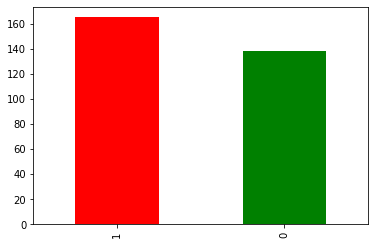

In [8]:
df.target.value_counts().plot(kind='bar', color = ['red','green']);

### 1.Heard disease frequency wrt sex

pd.crosstab(df.target, df.sex)

In [9]:
# 75% of woment have heart disease
# 50% of men have heard disease

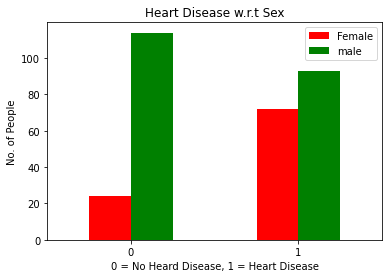

In [10]:
pd.crosstab(df.target, df.sex).plot.bar(color=['red','green'])

plt.title('Heart Disease w.r.t Sex')
plt.xlabel('0 = No Heard Disease, 1 = Heart Disease')
plt.ylabel('No. of People')
plt.legend(['Female','male'])
plt.xticks(rotation=0);

### 2.Heart disease w.r.t Age & Thalach (max heart rate)

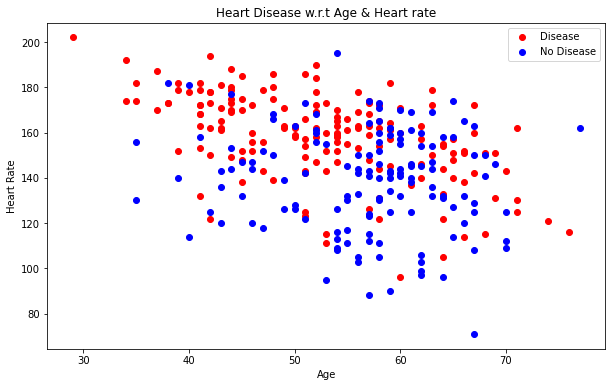

In [11]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], color='red')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color='blue')

plt.title('Heart Disease w.r.t Age & Heart rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Disease','No Disease']);

### 3. Age Distribution

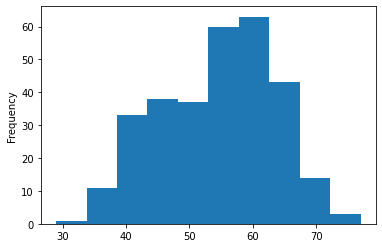

In [12]:
df.age.plot.hist();

### 4. Heart disease freq per chest pain type

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


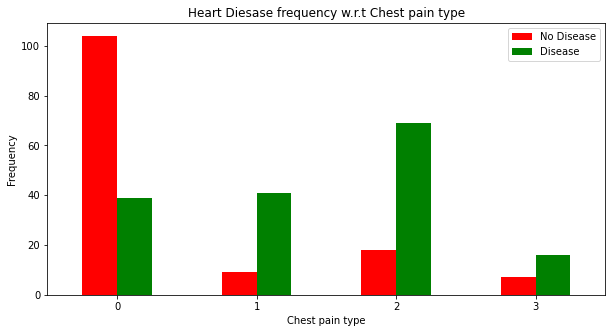

In [14]:
pd.crosstab(df.cp, df.target).plot.bar(figsize=(10,5),color=['red','green'])

plt.title('Heart Diesase frequency w.r.t Chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.legend(['No Disease','Disease'])

plt.xticks(rotation=0);

### 5. Correlation matrix

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


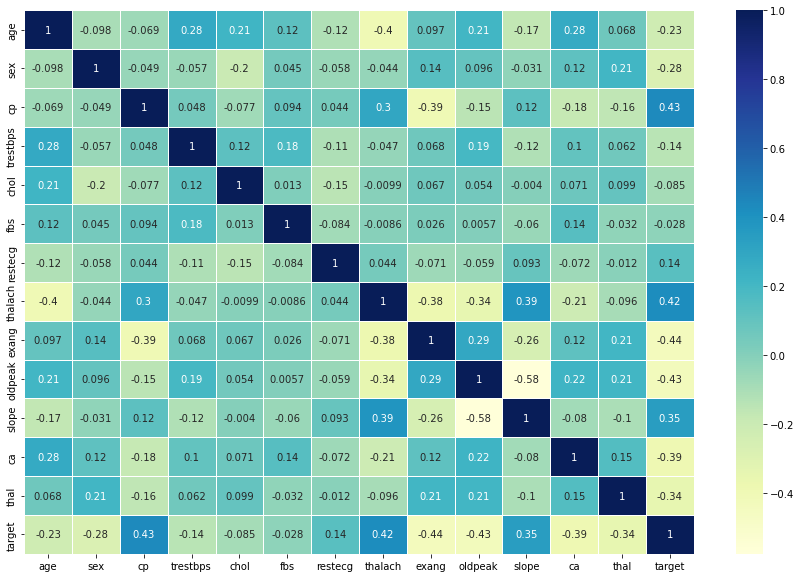

In [16]:
corr_matrix = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='YlGnBu');

## Modelling

In [17]:
x = df.drop('target',axis=1)
y = df.target

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [19]:
test_models = {'Logistic':LogisticRegression(),
              'KNN':KNeighborsClassifier(),
              'RF':RandomForestClassifier()}
results = {}

In [20]:
for model_name, model in test_models.items():
    model.fit(x_train, y_train)
    results[model_name] = model.score(x_test, y_test)
    
results

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RF': 0.8524590163934426}

## comparing models

In [21]:
model_results = pd.DataFrame(results, index=['accuracy'])

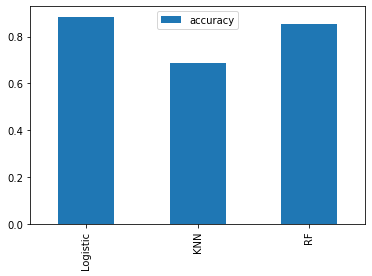

In [22]:
model_results.T.plot.bar(); 

### Hyperparameter tuning

### 1. KNN 

In [23]:
train_scores = []
test_scores = []

for i in range(1,21):
    model = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    train_scores.append(model.score(x_train, y_train))
    test_scores.append(model.score(x_test, y_test))

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Max KNN score for test data: 75.41%


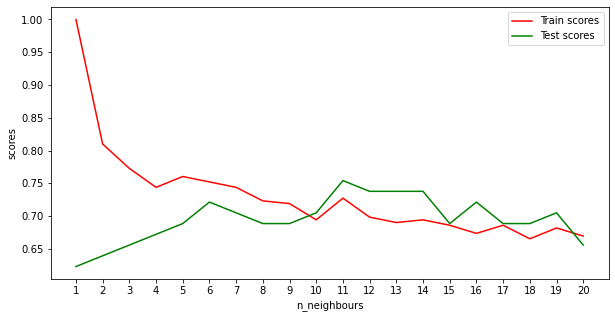

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(1,21), train_scores, color='red')
plt.plot(range(1,21), test_scores,  color='green')
plt.xticks(np.arange(1,21,1))

plt.legend(['Train scores','Test scores'])
plt.xlabel('n_neighbours')
plt.ylabel('scores');

print(f'Max KNN score for test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning for Logistic & RandomForestCalssifier using RandomSearchCV

In [27]:
#hyperparameters for logistic regression
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver':['liblinear']}

#hyperparameters for Random forest
rf_grid = {'n_estimators':np.arange(10,1000,50),
          'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

In [28]:
# Logistic
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_grid, cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [31]:
## RF
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid, cv=5, n_iter=20, verbose=True)

In [32]:
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
rs_rf.score(x_test, y_test)

0.8688524590163934

In [35]:
model_results

,Logistic,KNN,RF
accuracy,0.885246,0.688525,0.852459


### Tuning using GridSearchCV

In [36]:
log_reg_grid = {'C':np.logspace(-4,4,30),
               'solver':['liblinear']}

gs_log_reg = GridSearchCV(LogisticRegression(),log_reg_grid, verbose=True)

gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [39]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

### Evaluating Models

### Confustion matrix

In [41]:
y_pred = gs_log_reg.predict(x_test)

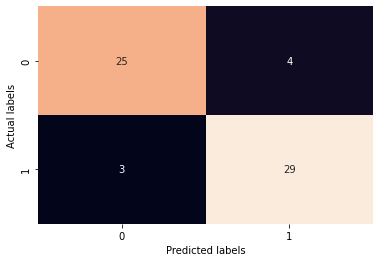

In [70]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels');

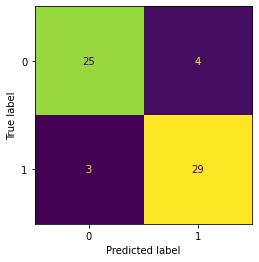

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);

### ROC AUC

In [50]:
from sklearn.metrics import plot_roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


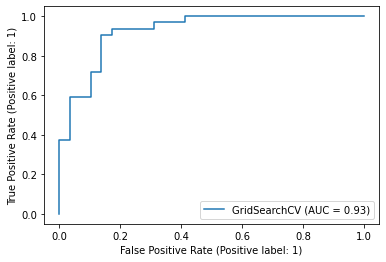

In [59]:
plot_roc_curve(gs_log_reg, x_test, y_test);

In [72]:
roc_auc_score(y_test, y_pred)

0.8841594827586207

### recall, accuracy, precision, f1

In [81]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [83]:
clf = LogisticRegression(C=0.20433597178569418, solver = 'liblinear')

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [90]:
accuracy = cross_val_score(clf, x, y, cv=5 ,scoring='accuracy').mean()
recall = cross_val_score(clf, x, y,cv=5, scoring='recall').mean()
precision = cross_val_score(clf, x, y,cv=5, scoring='precision').mean()
f1 = cross_val_score(clf, x, y,cv=5, scoring='f1').mean()

<AxesSubplot:title={'center':'Classification Metrics'}>

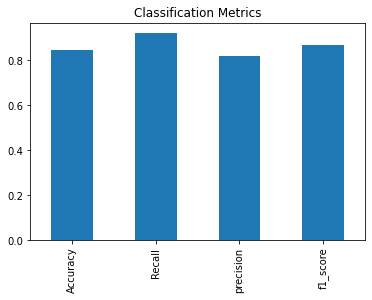

In [99]:
metrics = pd.DataFrame(data={'Accuracy':accuracy, 'Recall':recall, 'precision':precision, 'f1_score':f1}, index=[0])
metrics.T.plot.bar(title = 'Classification Metrics', legend=False)

### Classification Report

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Feature Importance

which feature contribute the  most in predicting the target

In [101]:
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(x_train ,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [102]:
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067044, -0.01156993, -0.00166374,
         0.04386111,  0.31275842,  0.02459361, -0.6041308 , -0.56862808,
         0.45051629, -0.63609895, -0.67663378]])

In [107]:
features_dict = dict(zip(df.columns, list(clf.coef_[0]))); features_dict

{'age': 0.003167280425913024,
 'sex': -0.8604465017405314,
 'cp': 0.6606704375815468,
 'trestbps': -0.011569931400895204,
 'chol': -0.0016637445504085657,
 'fbs': 0.04386110683275644,
 'restecg': 0.3127584216723769,
 'thalach': 0.024593614040407018,
 'exang': -0.6041307979006147,
 'oldpeak': -0.5686280785492623,
 'slope': 0.45051628777983527,
 'ca': -0.6360989513753182,
 'thal': -0.6766337783287578}

<BarContainer object of 13 artists>

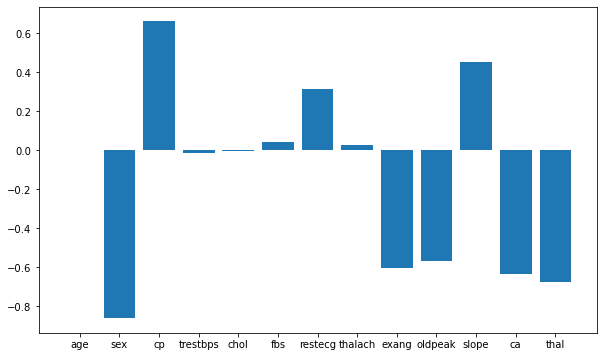

In [111]:
plt.figure(figsize=(10,6))
plt.bar(features_dict.keys(), features_dict.values())

* sex, exang, oldpeak, ca, thal has negative correlation with heart disease
* cp, fbs, restecg, thalach, slpe has positive correlation
* other features doesn't contribute much in predicting the target